This notebook is to test the inheritance machinery in gemini.
Families are drawn in an image where

#### Affection

+ **white** fill means **unaffected**
+ **gray** fill means **unknown**
+ **black** fill means **affected**

genotype status is labelled in the image.


See [this issue](https://github.com/arq5x/gemini/issues/388) for discussion along with [this gist](https://gist.github.com/brentp/4b3cbeebfaa7360b5ce6)

In [1]:
import gemini.tests
from gemini.tests.test_inheritance import TestFamily, family
Sample = family.Sample
HOM_REF, HET, UNKNOWN, HOM_ALT = range(4)


auto_rec
--------
default             	True
strict=False        	True
only_affected=False 	True
both False          	True


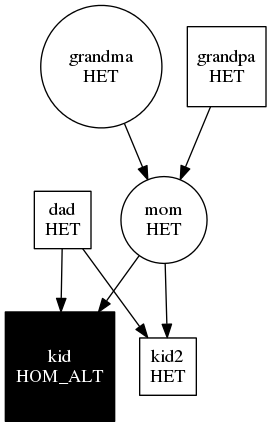

In [2]:
fam = TestFamily("""
 #family_id  sample_id   paternal_id maternal_id sex phenotype
 1   dad   0   0   1  1
 1   mom   grandpa   grandma   2  1
 1   kid   dad   mom   1  2
 1   kid2   dad   mom   1  1
 1   grandma 0   0     2  1
 1   grandpa 0   0     1  1""")
fam.gt_types = [HET, HET, HOM_ALT, HET, HET, HET]
fam.gt_depths = [20, 20, 20, 20, 20, 20]
fam.draw(tests=("auto_rec", ))

# Autosomal Recessive


auto_rec
--------
default             	False
strict=False        	False
only_affected=False 	True
both False          	True


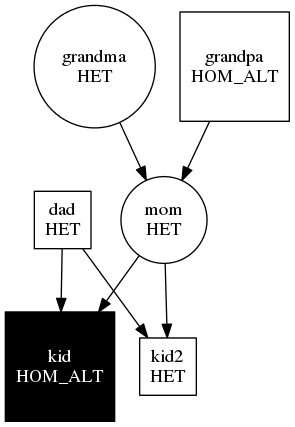

In [3]:
# if we set anyone else to HOM_ALT, it's no longer auto_rec unless only-affected is False:

# set grandpa to HOM_ALT
fam.gt_types[5] = HOM_ALT
fam.draw(tests=("auto_rec"))


In [4]:
# set grandpa back to het
fam.gt_types[5] = HET
# can require a greater read depth (note we set all samples to have depth 20 above)
fam.auto_rec(min_depth=12), fam.auto_rec(min_depth=22)

(True, False)


auto_rec
--------
default             	False
strict=False        	False
only_affected=False 	False
both False          	False


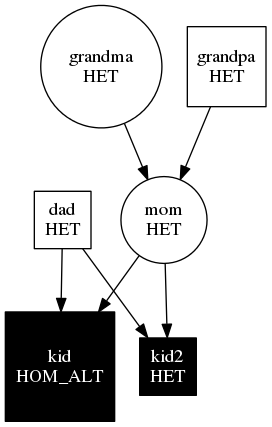

In [5]:
# if we set someone else to affected... the sibling. it can never be auto_rec:
fam.subjects[3].affected = True
fam.draw(tests=("auto_rec",))

# Autosomal Dominant


auto_dom
--------
default             	False
strict=False        	False
only_affected=False 	False
both False          	False


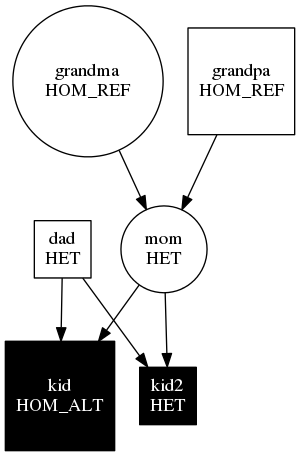

In [6]:
fam.gt_types = [HET, HET, HOM_ALT, HET, HOM_REF, HOM_REF]
fam.draw(tests=("auto_dom"))
# parents arent affected...

In [7]:
fam.de_novo(strict=False) # even though mom is a de-novo?

False


auto_dom
--------
default             	False
strict=False        	False
only_affected=False 	False
both False          	False


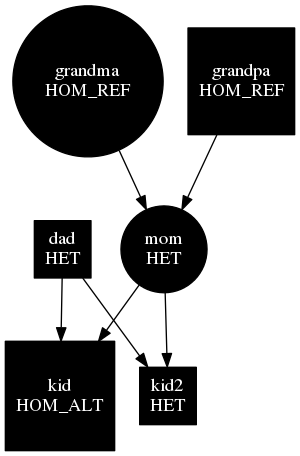

In [8]:
for s in fam.subjects: s.affected = True
fam.draw(tests=("auto_dom"))


auto_rec
--------
default             	False
strict=False        	False
only_affected=False 	False
both False          	False

auto_dom
--------
default             	False
strict=False        	False
only_affected=False 	False
both False          	False


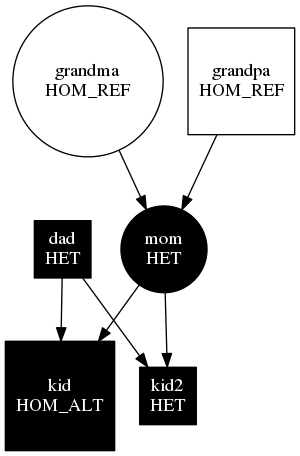

In [9]:
fam.subjects[5].affected = fam.subjects[4].affected = False
fam.draw()
# still not auto_dom because affected is homalt


auto_dom
--------
default             	False
strict=False        	False
only_affected=False 	False
both False          	False


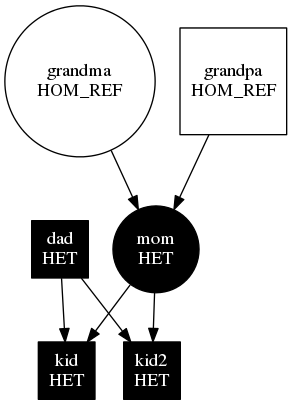

In [10]:
fam.gt_types[2] = HET
fam.draw(tests=("auto_dom",))



auto_dom
--------
default             	False
strict=False        	False
only_affected=False 	True
both False          	True


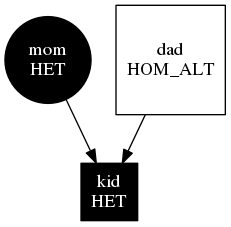


auto_dom
--------
default             	True
strict=False        	True
only_affected=False 	True
both False          	True


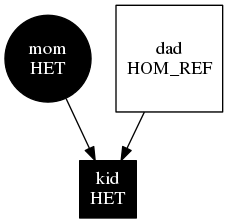

In [11]:
# TODO: check this
ffd = family.Family([Sample("mom", True, "female"), Sample("dad", False, "male"),
                    Sample("kid", True, "male")], "fam")
ffd.subjects[2].mom = ffd.subjects[0]
ffd.subjects[2].dad = ffd.subjects[1]

ffd = TestFamily(ffd)
ffd.gt_types = [HET, HOM_ALT, HET]
# dad is homalt, so only works under only_affected=False
ffd.draw(tests=("auto_dom",))

ffd.gt_types = [HET, HOM_REF, HET]
ffd.draw(tests=("auto_dom",))

##with unknowns


auto_dom
--------
default             	False
strict=False        	True
only_affected=False 	False
both False          	True


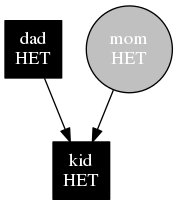

In [12]:
fam3 = TestFamily("""
 #family_id  sample_id   paternal_id maternal_id sex phenotype
 1   dad   0   0   1  2
 1   mom   grandpa   grandma   2  -9
 1   kid   dad   mom   1  2
""")
fam3.gt_types = [HET, HET, HET]
fam3.gt_depths = [20, 20, 20]
fam3.draw(tests=("auto_dom",))

# De Novo


de_novo
-------
default             	False
strict=False        	False
only_affected=False 	False
both False          	False


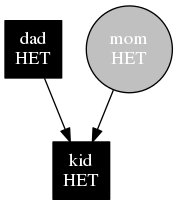

In [13]:
# not a de_novo because parents have it.
fam3.draw(tests=("de_novo",))


de_novo
-------
default             	False
strict=False        	False
only_affected=False 	False
both False          	False


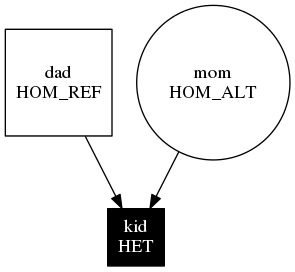

In [14]:
# should never be de_novo, because mom has it
fam3.gt_types = [HOM_REF, HOM_ALT, HET]
fam3.subjects[0].affected = False
fam3.subjects[1].affected = False
fam3.subjects[2].affected = True
fam3.draw(tests=("de_novo",))


auto_dom
--------
default             	False
strict=False        	False
only_affected=False 	False
both False          	False


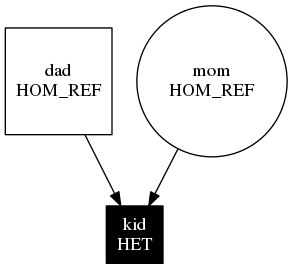

In [15]:
# should never be auto_dom (at least not this generation. since it's de_novo).
fam3.gt_types = [HOM_REF, HOM_REF, HET]

fam3.draw(tests=("auto_dom",))


de_novo
-------
default             	True
strict=False        	True
only_affected=False 	True
both False          	True


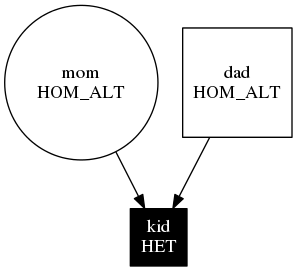

In [16]:
ff = family.Family([Sample("mom", False, "female"), Sample("dad", False, "male"),
            Sample("kid", True, "male")], "fam")
ff.subjects[2].mom = ff.subjects[0]
ff.subjects[2].dad = ff.subjects[1]

ff = TestFamily(ff)
ff.gt_types = [HOM_ALT, HOM_ALT, HET]
ff.draw(tests=("de_novo",))


de_novo
-------
default             	False
strict=False        	False
only_affected=False 	True
both False          	True


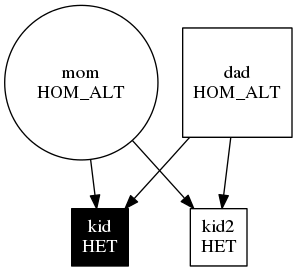

In [17]:
# unaffected sibling is a HET.

ff = family.Family([Sample("mom", False, "female"), Sample("dad", False, "male"),
            Sample("kid", True, "male"), Sample("kid2", False, "male")], "fam")
ff.subjects[2].mom = ff.subjects[0]
ff.subjects[2].dad = ff.subjects[1]
ff.subjects[3].mom = ff.subjects[0]
ff.subjects[3].dad = ff.subjects[1]

ff = TestFamily(ff)
ff.gt_types = [HOM_ALT, HOM_ALT, HET, HET]
ff.draw(tests=("de_novo",))